Resolver a Integral a seguir pelo Método da Integração de Monte Carlo e pelo Método da Integração por Importância.

$$ I = \int_{0}^{\infty}\ x(x^2+1)^{-2}\ dx$$

Importando as bibliotecas necessárias:

In [10]:
import numpy as np
import matplotlib.pyplot as plt

Inicialização da quantidade de amostras:

In [11]:
N = 10000000
u = np.random.uniform(0, 1, N)

Para o Método de Monte Carlo, o intervalo da Integral deve ser padronizado para $(0,\ 1)$ por uma variável auxiliar

$$u=\frac{1}{1+x}\ \therefore\ du=-\frac{dx}{(1+x)^2}=-u^2dx,$$ tal que $$ I = \int_{0}^{\infty} g(x)\ dx = \int_{0}^{1}\frac{g\left(\frac{1}{u}-1\right)}{u^2}\ du.$$

In [12]:
integral = np.sum((1/u-1)*pow((1/u-1)**2+1, -2)/u**2)/N
print(f'O resultado da integral pelo Método de Monte Carlo é {integral:.4f}.')

O resultado da integral pelo Método de Monte Carlo é 0.5000.


Plotando o Gráfico com a função e a área em destaque sendo a Integral calculada:

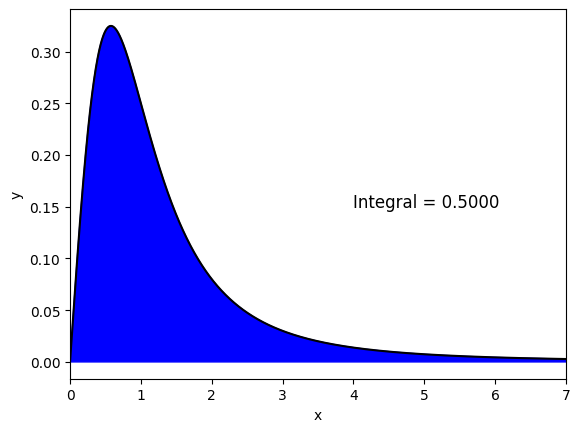

In [13]:
print('\n')
x = np.linspace(0, 1000, N)
y = x/(x**2 + 1)**2

plt.plot(x, y, color='black')
plt.fill_between(x, y, color='blue')
plt.xlim(0, 7); plt.xlabel('x'), plt.ylabel('y')
plt.text(4, 0.15, f'Integral = {integral:.4f}', fontsize=12, color='black')

plt.show()


Pelo Método da Integração por Importância, é definida uma função  g(x)  tal que

$$\int_{a}^{b}\ g(x)\ dx = 1$$ $$$$

Observado o comportamento de cauda longa da função $f(x)$, foi escolhida a função $g(x)=A\cdot e^{-x}$, com $A=1$.

$$\int_{0}^{\infty}\ A\cdot e^{-x}\ dx = 1\ \therefore\ \mathbf{A=1}$$ $$$$

É realizada a seguinte modificação:

$$I=\int_{a}^{b}\ f(x)\ dx = \int_{a}^{b}\ f(x)\cdot\frac{g(x)}{g(x)}\ dx = E_g\left[\frac{f(x)}{g(x)}\right]$$ $$$$

Para gerar amostras para $g(x)$, o Método da Inversa considera a Função de Distribuição Cumulativa de $x$:

$$F_X(x)=\int_{0}^{x}\ e^{-t}\ dt\ \therefore\ \mathbf{F_X(x) = 1-e^{-x}}$$

$$U = 1 - e^{-x} \rightarrow\ e^{-x} = 1 - U$$ $$$$

Para a Inversa da Função de Distribuição Cumulativa de  x:

$$ln(e^{-x}) = ln(1-U)\ \therefore\ x = -ln(1-U)$$
$$$$

---



In [14]:
x = -np.log(1 - u)
integral = np.sum(x*pow(x**2 + 1, -2)/np.exp(-x))/N
print(f'O resultado da integral pelo Método de Importância é {integral:.4f}')

O resultado da integral pelo Método de Importância é 0.4993
